In [1]:
import numpy as np
import torch
import gymnasium as gym
from gymnasium import spaces

import imageio
import os
import random
import copy

#from Combined_Agent_Double.Dueling_DDQN_Agent import Dueling_DDQN_Agent
#from Combined_Agent_Double.utils.random_agent import RandomAgent
#from Combined_Agent_Double.utils.actions import MORE_ACTIONS
#import Combined_Agent_Double.utils.stats_functions as sf

from Agents.Prio_n_step.Prio_DQN_Agent import Prio_DQN_Agent
from Agents.Pablo.Adaptative_Dueling_Double_DQN.Agent import Adaptative_Dueling_Double_DQN
from Agents.Random.random_agent import RandomAgent
from Agents.utils.actions import MORE_ACTIONS
import Agents.utils.stats_functions as sf

from Agents.Pablo.Agent import Dueling_DDQN_Agent
from Agents.Tapas_en_Mallorca.Agent import Combined_Agent

from importlib import reload

In [2]:
SEED_TRAIN_1 = 7489
SEED_TRAIN_2 = 1312
SEEDS_TEST = [291 + i for i in range(10)]

seed = SEED_TRAIN_1

USE_MORE_ACTIONS = False

In [3]:
env_name = "../remake/Noisy_Dueling_Double_DQN_Cartpole"
#env = h_env.HockeyEnv()
#h_env.HockeyEnv().seed(seed)
env = gym.make("CartPole-v1", render_mode = "rgb_array")

state_space = env.observation_space

"""if(USE_MORE_ACTIONS):
    action_space = spaces.Discrete(len(MORE_ACTIONS))
else: 
    action_space = env.discrete_action_space"""
action_space = env.action_space
agent = Adaptative_Dueling_Double_DQN(
    state_space,
    action_space,
    seed = seed,
    update_target_every = 10,
    batch_size = 64,
    use_eps_decay = False,
    use_dueling = True,
    use_double = True,
    use_noisy = True,
    learning_rate = 0.0002
)

#agent = Prio_DQN_Agent(state_space, action_space, seed = seed, eps = 0.01, learning_rate = 0.0001, hidden_sizes = [256, 256], n_steps = 5, env = env, use_more_actions = USE_MORE_ACTIONS)
agent.Q.load(env_name)

Dueling Network Architecture with Noisy Layers
  Input Layer: (4)
  Hidden Layer 1: Linear(4, 128) -> Tanh
  Hidden Layer 2: NoisyLinear(128, 128) -> Tanh
  Value Stream: Linear(128, 1)
  Advantage Stream: Linear(128, 2)
------------------------------------------------------
Dueling Network Architecture with Noisy Layers
  Input Layer: (4)
  Hidden Layer 1: Linear(4, 128) -> Tanh
  Hidden Layer 2: NoisyLinear(128, 128) -> Tanh
  Value Stream: Linear(128, 1)
  Advantage Stream: Linear(128, 2)
------------------------------------------------------
Network loaded from ../remake/Noisy_Dueling_Double_DQN_Cartpole/weights/training_finished.pth


/home/pablosbl/Documents/GitHub/hockey-en-mallorca/src/hockey-env/Agents/Pablo/Adaptative_Dueling_Double_DQN/QFunction.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

In [4]:
stats, losses = sf.load_stats(env_name)

Plot saved at ../remake/Noisy_Dueling_Double_DQN_Cartpole/stats/plots/returns_plot.png


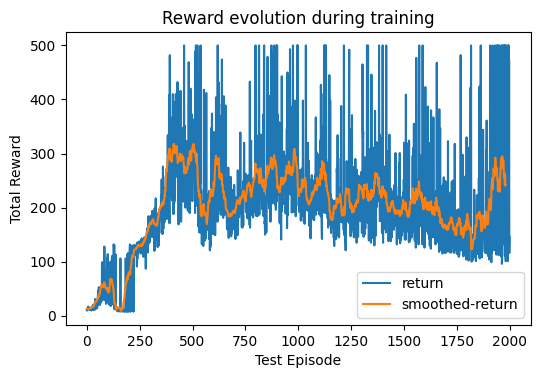

In [5]:
sf.plot_returns(stats, env_name)

Plot saved at ../remake/Noisy_Dueling_Double_DQN_Cartpole/stats/plots/losses_plot.png


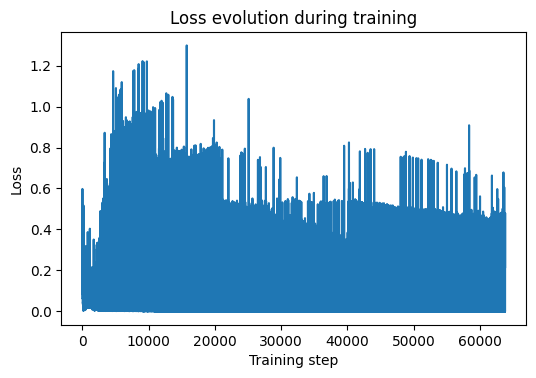

In [6]:
sf.plot_losses(losses, env_name)

In [12]:
def test_agent(agent = agent, test_episodes = len(SEEDS_TEST), max_steps = 1000, agent_name = "unknown", env_name = env_name):
   
    test_rewards = []
    test_name = agent_name
  
    for episode in range(test_episodes):

        state = env.reset(seed = seed)
        env.action_space.seed(seed)
        state = state[0] if isinstance(state, tuple) else state  # Handle Gymnasium compatibility
        total_reward = 0
        step = 0

        frames = []
        
        for t in range(max_steps):

            done = truncated = False

            frame = env.render()
            if frame is not None:
                frames.append(frame)

            a1 = a1_cont = agent.act(state)
            
            next_state, reward, done, truncated, _ = env.step(a1_cont)
            
            total_reward += reward

            state = next_state
        
            if done or truncated:
                break

        test_rewards.append(total_reward)
        print(f"Test Episode {episode+1}, Total Reward: {total_reward}")
        
        if frames:
            os.makedirs(f"{env_name}/test_gifs/{test_name}", exist_ok=True)
            imageio.mimsave(f"{env_name}/test_gifs/{test_name}/test_episode_{episode+1}.gif", frames, fps=30)

    env.close()
    results_name = f"test_results_{test_name}"
    sf.save_test_results(env_name, test_rewards, name = results_name)

Test Episode 1, Total Reward: 279.0
Test Episode 2, Total Reward: 500.0
Test Episode 3, Total Reward: 276.0
Test Episode 4, Total Reward: 243.0
Test Episode 5, Total Reward: 255.0
Test Episode 6, Total Reward: 311.0
Test Episode 7, Total Reward: 500.0
Test Episode 8, Total Reward: 255.0
Test Episode 9, Total Reward: 288.0
Test Episode 10, Total Reward: 266.0
Plot saved at ../remake/Noisy_Dueling_Double_DQN_Cartpole/stats/plots/test_results_Noisy_Dueling_Double_DQN.png


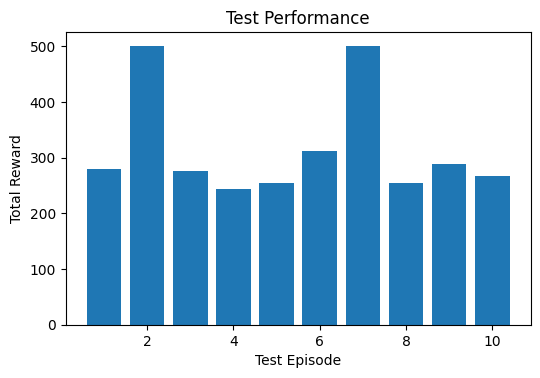

In [13]:
test_agent(agent_name = "Noisy_Dueling_Double_DQN")

Test Episode 1, Total Reward: -3.512463310445922
Test Episode 2, Total Reward: 9.276349117840361
Test Episode 3, Total Reward: -12.415231970715785
Test Episode 4, Total Reward: -0.543411222333951
Test Episode 5, Total Reward: -1.8646718873308141
Test Episode 6, Total Reward: 9.571002426516056
Test Episode 7, Total Reward: 9.12679397813487
Test Episode 8, Total Reward: 9.269271263047443
Test Episode 9, Total Reward: 9.134231883736645
Test Episode 10, Total Reward: -11.034267755874174
Plot saved at ../weights/prio_agent_self_play_19_2_25/stats/plots/test_results_weak_vs_prio_agent.png


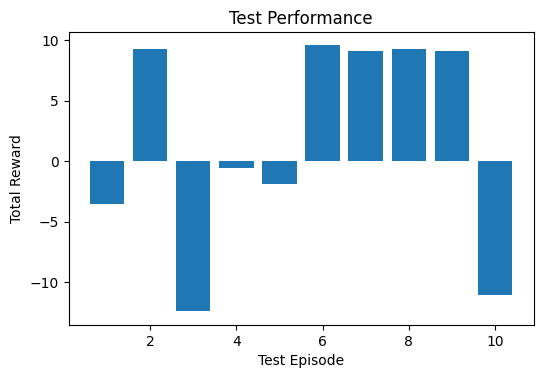

In [32]:
test_agent(opponent = h_env.BasicOpponent(weak=True), opponent_name = "weak", agent_name = "prio_agent")



Test Episode 1, Total Reward: -4.0692694574895985
Test Episode 2, Total Reward: 9.538629130283486
Test Episode 3, Total Reward: -4.818802293541866
Test Episode 4, Total Reward: -2.6555218897549957
Test Episode 5, Total Reward: 8.812792686206167
Test Episode 6, Total Reward: -5.7259169994470165
Test Episode 7, Total Reward: 7.889734570345159
Test Episode 8, Total Reward: -4.413012245562148
Test Episode 9, Total Reward: -4.6169402011320795
Test Episode 10, Total Reward: -4.4316712719213776
Plot saved at ../weights/prio_agent_self_play_19_2_25/stats/plots/test_results_non_weak_vs_prio_agent.png


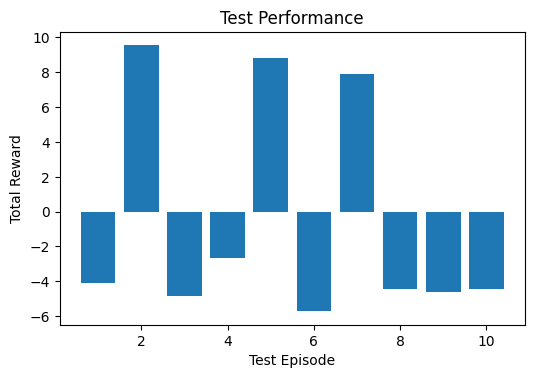

In [33]:
test_agent(opponent = h_env.BasicOpponent(weak=False), opponent_name = "non_weak", agent_name = "prio_agent")

In [34]:
test_episodes = len(SEEDS_TEST)
test_rewards = []

opponent = copy.deepcopy(agent)
opponent.Q.load(env_name, name = "episode_1500")

max_steps = 30000

for episode in range(test_episodes):

    state, _ = env.reset(seed = SEEDS_TEST[episode])
    state = state[0] if isinstance(state, tuple) else state  # Handle Gymnasium compatibility

    obs_agent2 = env.obs_agent_two()
    obs_agent2 = obs_agent2[0] if isinstance(obs_agent2, tuple) else obs_agent2

    total_reward = 0

    frames = []
    
    for t in range(max_steps):

        done = False

        frame = env.render(mode = "rgb_array")
        if frame is not None:
            frames.append(frame)

        a1 = agent.perform_greedy_action(state, eps = 0.0)
        a2 = opponent.perform_greedy_action(obs_agent2)

        if(USE_MORE_ACTIONS):
            a1_cont = MORE_ACTIONS[a1]
            a2 = MORE_ACTIONS[a2]
        else: 
            a1_cont = env.discrete_to_continous_action(a1)
            a2 = env.discrete_to_continous_action(a2)

        full_action = np.hstack([a1_cont, a2])

        next_state, reward, done, truncated, _ = env.step(full_action)
        
        total_reward += reward

        state = next_state
        obs_agent2 = env.obs_agent_two()

        if done or truncated: break

    test_rewards.append(total_reward)
    print(f"Test Episode {episode+1}, Total Reward: {total_reward}")
    
    if frames:
        os.makedirs(f"{env_name}/test_gifs/selfplay", exist_ok=True)
        imageio.mimsave(f"{env_name}/test_gifs/selfplay/test_episode_{episode+1}.gif", frames, fps=30)

env.close()

sf.save_test_results(env_name, test_rewards, name = "test_results_selfplay")

FileNotFoundError: [Errno 2] No such file or directory: '../weights/prio_agent_self_play_19_2_25/weights/episode_1500.pth'